<center>
<img  src='https://images-ext-2.discordapp.net/external/dH_wMFcpccO5xRSP7dPvdn4VgNbETdeO_hZvSmataJM/https/logos-world.net/wp-content/uploads/2021/03/World-Health-Organization-WHO-Logo.png' alt="World Health Organisation" width="400px"/>

<br />

<font size="6em">Life Expectancy Predictive Model</font>

<font size="5em"><b>WHO R YOU?</b> <i>Analytics</i></font>

</center>

<br /><br />

- Ed Boynton
- Prasharn Selvaranjan
- Alistair Boyer
- Elif Varli


<br /><br /><br />
# Load and Explore Data

## Load

In [1]:
# import libraries

# data processing
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tools
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# load dataset
df = pd.read_csv(r'https://boyer-research.com/files/Life%20Expectancy%20Data.csv')

In [3]:
# size of dataset
df.shape

(2864, 21)

In [4]:
# quick look at first 5 rows
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [5]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [6]:
df.columns.to_list()

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Life_expectancy']

In [7]:
# count nulls and zeros in columns
pd.DataFrame(
    {
        "nulls": df.isnull().sum(axis=0),
        "zeros": (df==0).sum(axis=0),
    }
)

,nulls,zeros
Country,0,0
Region,0,0
Year,0,0
Infant_deaths,0,0
Under_five_deaths,0,0
Adult_mortality,0,0
Alcohol_consumption,0,38
Hepatitis_B,0,0
Measles,0,0
BMI,0,0


In [8]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [9]:
# look for category-type values
for label in ['Region', 'Economy_status_Developed', 'Economy_status_Developing']:
    print("=" * 80)
    print(f'{label} [{df[label].nunique()} unique values]')
    print(df[label].unique())

Region [9 unique values]
['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']
Economy_status_Developed [2 unique values]
[0 1]
Economy_status_Developing [2 unique values]
[1 0]


In [10]:
sorted(df['Region'].unique())

['Africa',
 'Asia',
 'Central America and Caribbean',
 'European Union',
 'Middle East',
 'North America',
 'Oceania',
 'Rest of Europe',
 'South America']

In [11]:
# convert region to category
df['Region'] = df['Region'].astype("category")

In [12]:
df.dtypes

Country                          object
Region                         category
Year                              int64
Infant_deaths                   float64
Under_five_deaths               float64
Adult_mortality                 float64
Alcohol_consumption             float64
Hepatitis_B                       int64
Measles                           int64
BMI                             float64
Polio                             int64
Diphtheria                        int64
Incidents_HIV                   float64
GDP_per_capita                    int64
Population_mln                  float64
Thinness_ten_nineteen_years     float64
Thinness_five_nine_years        float64
Schooling                       float64
Economy_status_Developed          int64
Economy_status_Developing         int64
Life_expectancy                 float64
dtype: object

In [13]:
# Economy_status is partially one hot encoded
((df['Economy_status_Developed'] + df['Economy_status_Developing'])==1).all()

True

## Metadata

|Field|Description|Present|
|---:|:---|:---|
|Country|Country|Yes|
|Region|Region|New|
|Year|Year|Yes|
|infant deaths|Number of Infant Deaths per 1000 population|Yes|
|under-five deaths|Number of under-five deaths per 1000 population|Yes|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|Yes|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|Yes|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|Yes|
|Measles|Measles - number of reported cases per 1000 population|Yes|
|BMI|Average Body Mass Index of entire population|Yes|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|Yes|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|Yes|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|Yes|
|GDP|Gross Domestic Product per capita (in USD)|Yes|
|Population|Population of the country|Yes|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|Different range|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|Yes|
|Schooling|Number of years of Schooling(years)|Yes|
|Status|Developed or Developing status|One hot encoded|
|Life expectancy|Life Expectancy in age|Yes|
|Income composition of resources|Income composition of resources|No|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|No|
|percentage expenditure|Expenditure on health as a percent of Gross Domestic Product per capita(%)|No|

## Train Test Split

### $X$ and $y$, Independant and Dependant Variables

In [14]:
# take copy of dataset
X = df.copy()

# extract life expectancy from X
y = X.pop("Life_expectancy")

# X, independent variable: column labels and shape
X.columns, X.shape

(Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
        'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
        'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
        'Population_mln', 'Thinness_ten_nineteen_years',
        'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
        'Economy_status_Developing'],
       dtype='object'),
 (2864, 20))

In [15]:
# y, dependent variable: label and shape
y.name, y.shape

('Life_expectancy', (2864,))

### Train Test Split

In [16]:
# split X, y into train (for building model) and test (for evaluating model)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

# ensure indexes still match
assert (X_train.index == y_train.index).all()
assert (X_test.index == y_test.index).all()

In [17]:
# size info
X_train.shape, X_test.shape

((2291, 20), (573, 20))

## Correlation

In [18]:
# generate correlation of numeric values
corr = X_train.join(y_train).corr(method="spearman", numeric_only=True)

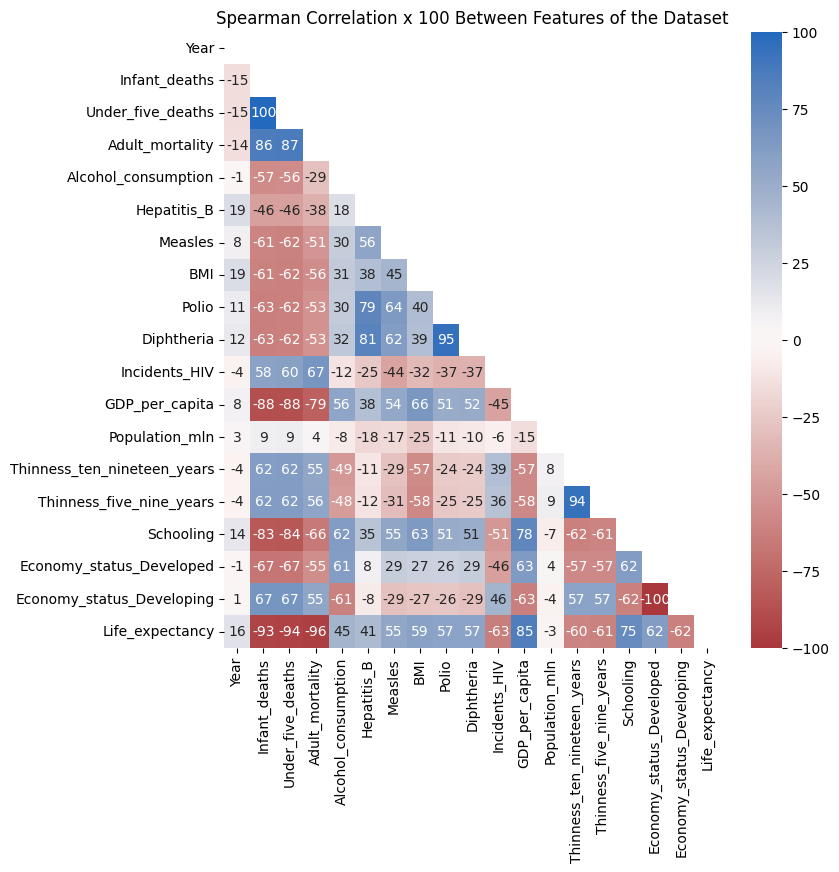

In [19]:
# correlation heatmap
plt.figure(
    figsize=(8, 8),
)

sns.heatmap(
    corr*100,
    annot=True,
    fmt="0.0f",
    cmap="vlag_r",
    vmin=-100,
    vmax=100,
    mask=np.triu(np.ones(corr.shape)),
)

plt.title("Spearman Correlation x 100 Between Features of the Dataset")

plt.show()

  - Under 5 mortality overlaps infant mortality (medical definition <1 year). Therefore, very high correlation.


<hr />
  
  - Strong negative correlation between vaccination rate and under 5 mortality.
  - Polio and Diptheria vaccinated together (with Tetanus using DTP vaccine). \
    https://www.cdc.gov/vaccines/hcp/vis/vis-statements/dtap.html
  - Since 2015, polio has been eradicated globally, except in Afghanistan and Pakistan. \
    Therefore, polio information could be sensitive and linked to country.

<hr />

  - Thinness age ranges are adjacent &rarr; very high correlation.
  - Thinness: Z scores for BMI < 2 standard deviation of normal values. \
    Article: [Int. J. Prev. Med. 2014 Jun; 5(6): 695–702](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4085921)
  - Thinness related to BMI.

In [20]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

<hr />

## Pairplots - Detailed Correlation Analysis

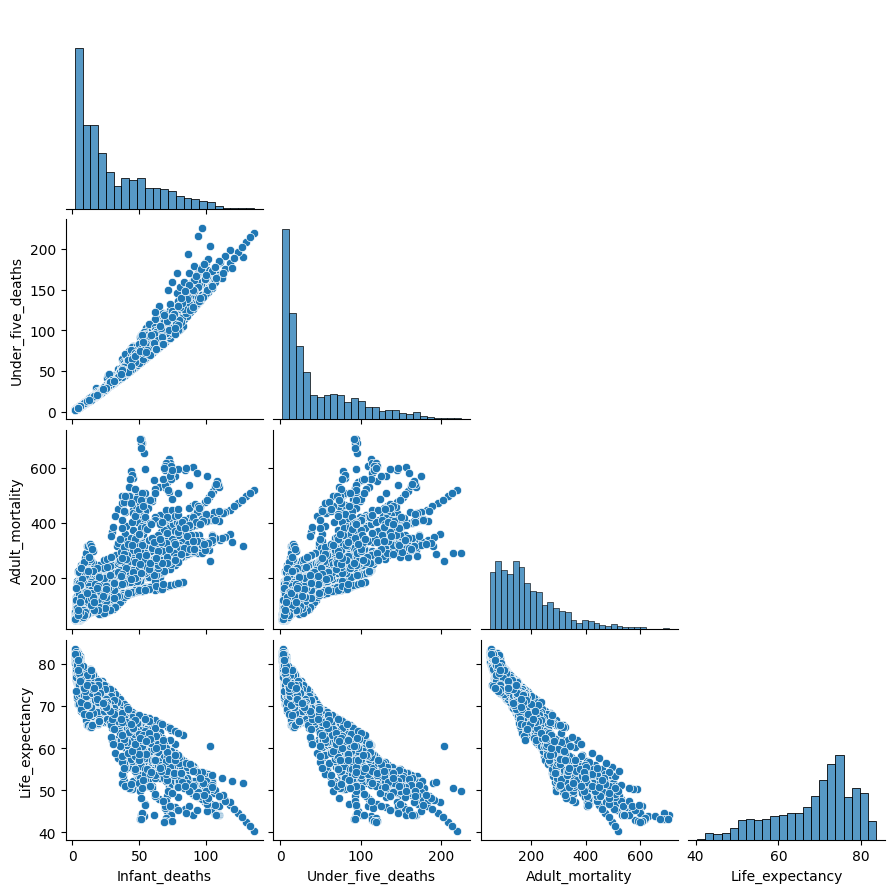

In [21]:
# mortality
g = sns.pairplot(
    X_train.join(y_train)[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Life_expectancy', ]],
    corner=True,
)
g.fig.set_size_inches(9, 9)

  - Under 5 mortality overlaps infant mortality (medical definition <1 year). Therefore, very high correlation.

<hr />

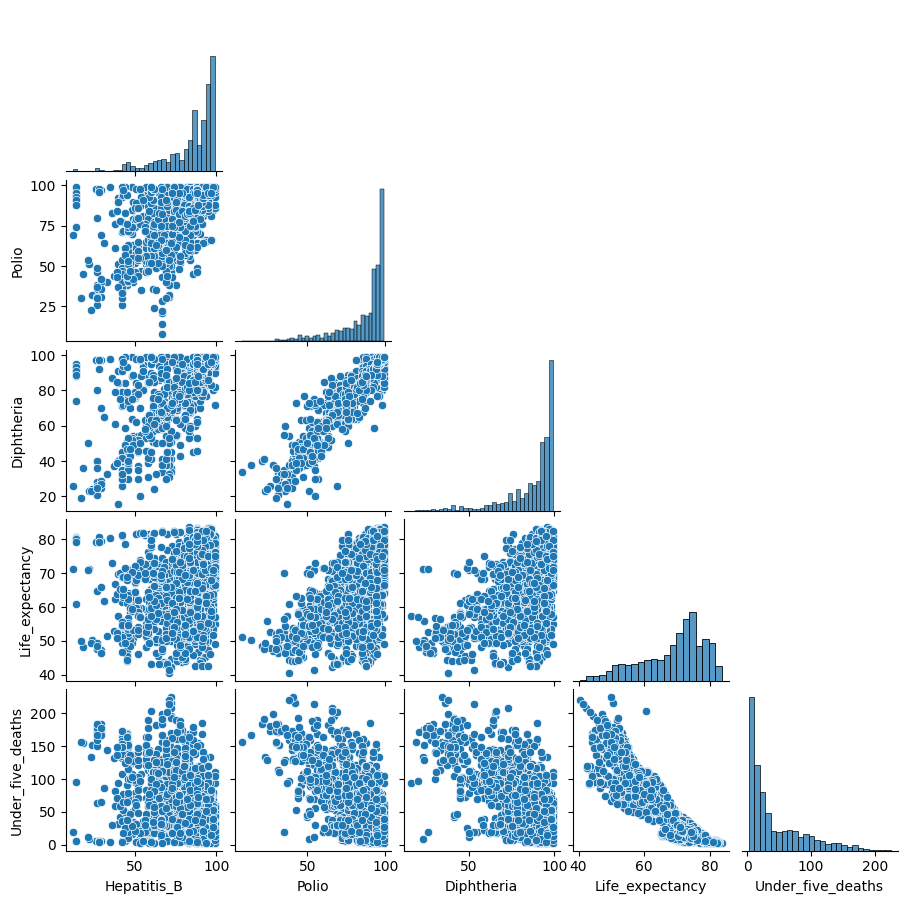

In [22]:
# vaccinations
g = sns.pairplot(
    X_train.join(y_train)[['Hepatitis_B', 'Polio', 'Diphtheria', 'Life_expectancy', 'Under_five_deaths']],
    corner=True,
)
g.fig.set_size_inches(9, 9)

  
  - Strong negative correlation between vaccination rate and under 5 mortality.
  - Polio and Diptheria vaccinated together (with Tetanus using DTP vaccine). \
    https://www.cdc.gov/vaccines/hcp/vis/vis-statements/dtap.html
  - Since 2015, polio has been eradicated globally, except in Afghanistan and Pakistan. \
    Therefore, polio information could be sensitive and linked to country.

<hr />

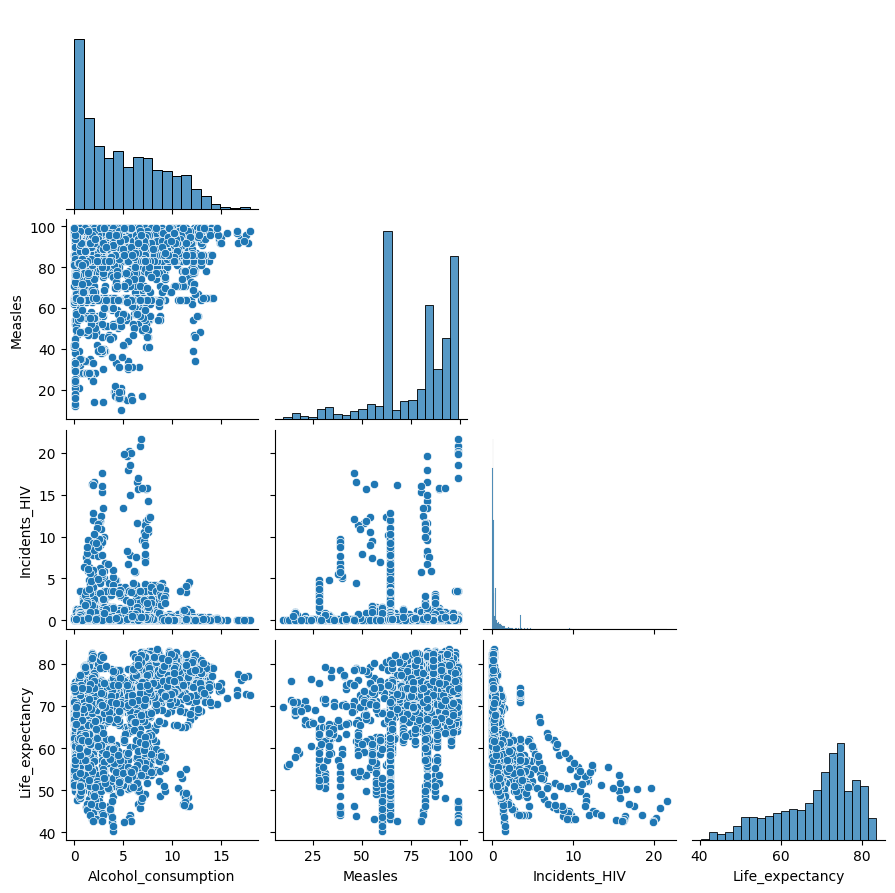

In [23]:
# diseases
g = sns.pairplot(
    X_train.join(y_train)[['Alcohol_consumption', 'Measles', 'Incidents_HIV', 'Life_expectancy', ]],
    corner=True,
)
g.fig.set_size_inches(9, 9)

<hr />

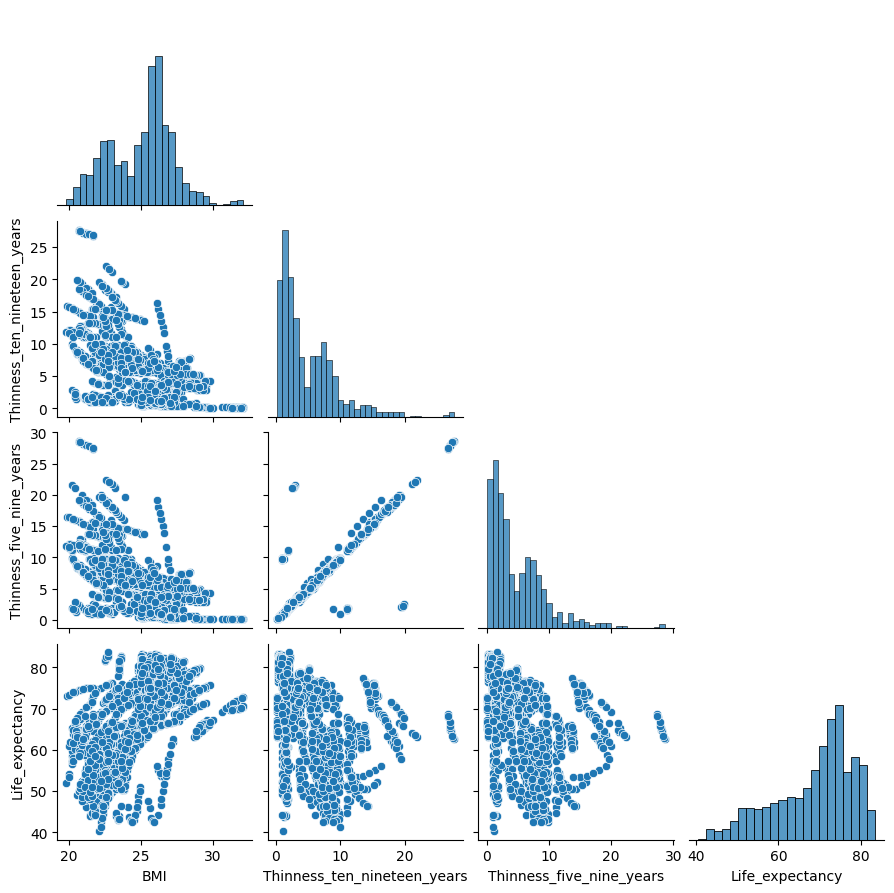

In [24]:
# weight
g = sns.pairplot(
    X_train.join(y_train)[['BMI', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Life_expectancy', ]],
    corner=True,
)
g.fig.set_size_inches(9, 9)

  - Thinness age ranges are adjacent &rarr; very high correlation.
  - Thinness: Z scores for BMI < 2 standard deviation of normal values. \
    Article: [Int. J. Prev. Med. 2014 Jun; 5(6): 695–702](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4085921)
  - Thinness related to BMI.

<hr />

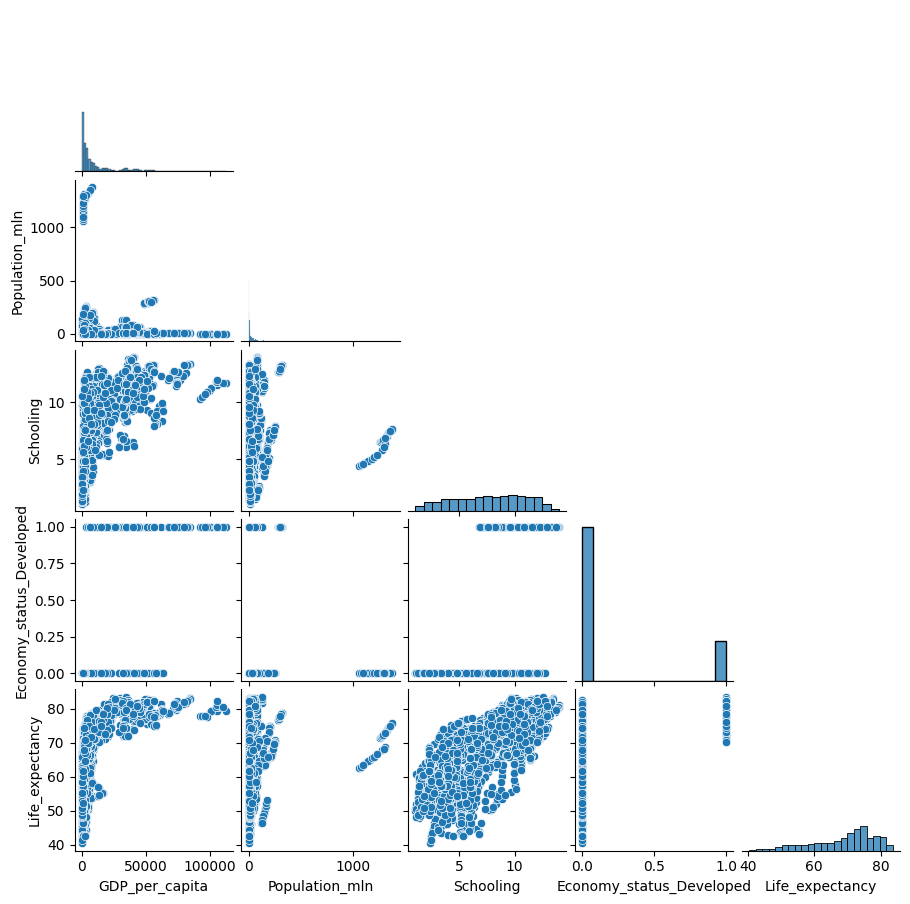

In [25]:
g = sns.pairplot(
    X_train.join(y_train)[['GDP_per_capita', 'Population_mln', 'Schooling', 'Economy_status_Developed', 'Life_expectancy',]],
    corner=True,
)
g.fig.set_size_inches(9, 9)

<hr />

## Summary

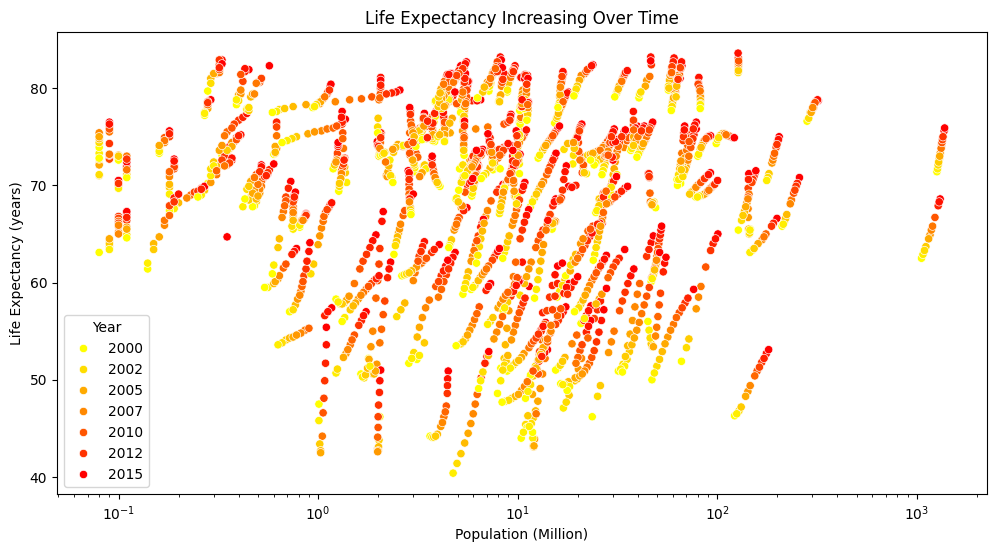

In [26]:
# explore population relationship
fig = plt.figure(
    figsize=(12,6)
)

sns.scatterplot(
    x=X_train['Population_mln'],
    y=y_train,
    hue=X_train['Year'],
    palette="autumn_r",
)

plt.title("Life Expectancy Increasing Over Time")
plt.ylabel("Life Expectancy (years)")
plt.xlabel("Population (Million)")
plt.xscale("log")
plt.show()

- Life expectancy trajectory spread out using population.
- Each line of dots represents the trajectory of a single country.
- The darker dots represent more recent values.
- There was an overwhelming general improvement in life expectancy over time.

<br /><br /><br />
# Prepare the Data for the Modelling Process

## Non Linear Relationships

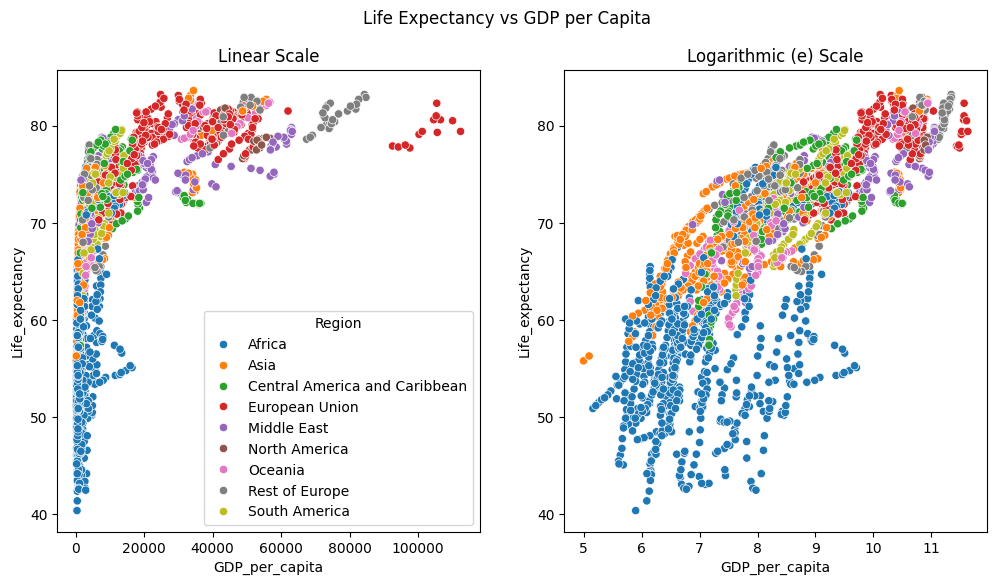

In [27]:
# explore potential log relationship with GDP
fig, axs = plt.subplots(
    1,2,
    figsize=(12,6)
)

sns.scatterplot(
    x=X_train['GDP_per_capita'],
    y=y_train,
    ax=axs[0],
    hue=X_train['Region'],
)
sns.scatterplot(
    x=np.log(X_train['GDP_per_capita']),
    y=y_train,
    ax=axs[1],
    hue=X_train['Region'],
    legend=None, # same as the one in the first chart
)

plt.suptitle("Life Expectancy vs GDP per Capita")
axs[0].set_title("Linear Scale")
axs[1].set_title("Logarithmic (e) Scale")

plt.show()

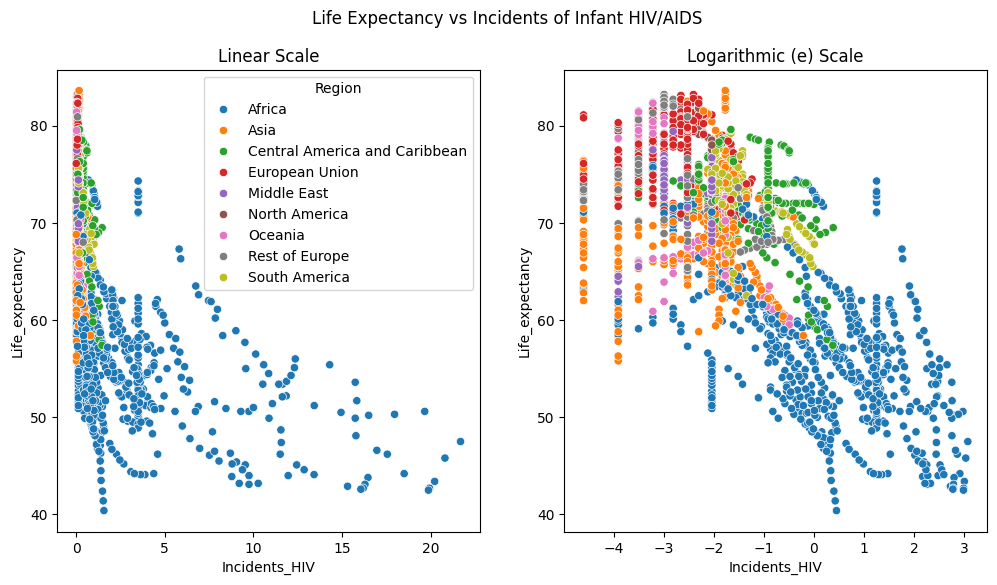

In [28]:
# exlore potential log relationship with HIV

fig, axs = plt.subplots(
    1,2,
    figsize=(12,6)
)

sns.scatterplot(
    x=X_train['Incidents_HIV'],
    y=y_train,
    ax=axs[0],
    hue=X_train['Region'],
)
sns.scatterplot(
    x=np.log(X_train['Incidents_HIV']),
    y=y_train,
    ax=axs[1],
    hue=X_train['Region'],
    legend=None, # same as the one in the first chart
)

plt.suptitle("Life Expectancy vs Incidents of Infant HIV/AIDS")
axs[0].set_title("Linear Scale")
axs[1].set_title("Logarithmic (e) Scale")

plt.show()

 - Noisy at low Incidents of Infant HIV/AIDS.

## One Hot Encoding - Most Used Values

In [29]:
# Find most frequent value of Economy_status
X_train[['Economy_status_Developed', 'Economy_status_Developing']].sum()
# select Economy_status_Developing to drop

Economy_status_Developed      474
Economy_status_Developing    1817
dtype: int64

In [30]:
# Find most frequent value of Region
X_train[['Region']].value_counts()
# select Africa to drop

Region                       
Africa                           665
European Union                   343
Asia                             337
Central America and Caribbean    227
Rest of Europe                   199
Middle East                      175
South America                    161
Oceania                          143
North America                     41
dtype: int64

## Bucket Values

  - Use buckets to partially anonymise data
  - Generate buckets depending on quantile

In [63]:
bin_edges = {
    'Infant_deaths': 5,
    'Under_five_deaths': 5,
    'Adult_mortality': 5,
    'Alcohol_consumption': 5,
    'Hepatitis_B': 5,
    'Measles': 5,
    'BMI': 5,
    'Polio': 5,
    'Diphtheria': 5,
    'Incidents_HIV': 5,
    'GDP_per_capita': 5,
    'Population_mln': 5,
    'Thinness_ten_nineteen_years': 5,
    'Thinness_five_nine_years': 5,
    'Schooling': 5,
}

# get the bin edges for the columns
for column_label, q in bin_edges.items():
    # generate bins
    _, edges = pd.qcut(X_train[column_label], q=q, retbins=True)
    edges = list(edges)
    # expand the bins to fit all possible values
    edges[0] = -1e20
    edges[-1] = 1e20
    # save the bins
    bin_edges[column_label] = edges

bin_edges  # for export

{'Infant_deaths': [-1e+20, 6.3, 14.8, 27.4, 54.3, 1e+20],
 'Under_five_deaths': [-1e+20, 7.5, 17.2, 33.1, 78.8, 1e+20],
 'Adult_mortality': [-1e+20, 94.6415, 141.9155, 190.0275, 272.4865, 1e+20],
 'Alcohol_consumption': [-1e+20, 0.8, 2.73, 5.560000000000013, 8.75, 1e+20],
 'Hepatitis_B': [-1e+20, 74.0, 87.0, 93.0, 97.0, 1e+20],
 'Measles': [-1e+20, 64.0, 73.0, 86.0, 95.0, 1e+20],
 'BMI': [-1e+20, 22.7, 25.0, 25.9, 26.7, 1e+20],
 'Polio': [-1e+20, 77.0, 90.0, 95.0, 98.0, 1e+20],
 'Diphtheria': [-1e+20, 77.0, 90.0, 95.0, 98.0, 1e+20],
 'Incidents_HIV': [-1e+20, 0.07, 0.13, 0.19, 0.76, 1e+20],
 'GDP_per_capita': [-1e+20, 1124.0, 2901.0, 6236.000000000002, 18441.0, 1e+20],
 'Population_mln': [-1e+20, 1.35, 5.32, 11.050000000000002, 31.36, 1e+20],
 'Thinness_ten_nineteen_years': [-1e+20, 1.2, 2.3, 4.9, 7.9, 1e+20],
 'Thinness_five_nine_years': [-1e+20, 1.3, 2.5, 4.9, 7.9, 1e+20],
 'Schooling': [-1e+20, 4.4, 6.8, 8.9, 10.8, 1e+20]}

## Scaling Values

 - Use scalers to normalise column data by median, scaled by quartile.
 - Reduce effect of scale on model.

In [64]:
# select scalers for columns
scalers = {
    'Year': RobustScaler(),
    'Infant_deaths': RobustScaler(),
    'Under_five_deaths': RobustScaler(),
    'Adult_mortality': RobustScaler(),
    'Alcohol_consumption': RobustScaler(),
    'Hepatitis_B': RobustScaler(),
    'Measles': RobustScaler(),
    'BMI': RobustScaler(),
    'Polio': RobustScaler(),
    'Diphtheria': RobustScaler(),
    'Incidents_HIV': RobustScaler(),
    'GDP_per_capita': RobustScaler(),
    'Population_mln': RobustScaler(),
    'Thinness_ten_nineteen_years': RobustScaler(),
    'Thinness_five_nine_years': RobustScaler(),
    'Schooling': RobustScaler(),
}

# fit the scalers to the columns
for column_label, scaler in scalers.items():
    scaler.fit(X_train[[column_label]])

scalers_export = {
    label: (scalers[label].center_[0], scalers[label].scale_[0]) for label in scalers.keys()
}

scalers_export

{'Year': (2008.0, 8.0),
 'Infant_deaths': (19.8, 39.9),
 'Under_five_deaths': (23.3, 57.150000000000006),
 'Adult_mortality': (164.1015, 142.96425),
 'Alcohol_consumption': (4.05, 6.5600000000000005),
 'Hepatitis_B': (89.0, 18.0),
 'Measles': (83.0, 29.0),
 'BMI': (25.5, 3.1999999999999993),
 'Polio': (93.0, 16.0),
 'Diphtheria': (93.0, 16.0),
 'Incidents_HIV': (0.16, 0.39999999999999997),
 'GDP_per_capita': (4219.0, 11518.0),
 'Population_mln': (8.11, 22.424999999999997),
 'Thinness_ten_nineteen_years': (3.3, 5.8),
 'Thinness_five_nine_years': (3.3, 5.8),
 'Schooling': (7.9, 5.300000000000002)}


## Feature Engineering Function

In [33]:
X_train.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing'],
      dtype='object')

In [34]:
def engineer_features(dataframe):
    """Feature engineering for WHO life expectancy data."""

    # GLOBALS (read only but a reminder)
    global scalers
    global bin_edges

    # take copy of dataframe
    dataframe = dataframe.copy()

    # non linear relationships
    dataframe['GDP_per_capita_log'] = np.log(dataframe['GDP_per_capita'])
    dataframe['Incidents_HIV_log'] = np.log(dataframe['Incidents_HIV'])

    # one hot encoding of region
    dataframe = pd.get_dummies(
        dataframe,
        prefix="Region",
        columns=["Region"],
        drop_first=False,
        dtype="int",
    )

    # bucketising columns
    for column_label, edges in bin_edges.items():
        dataframe[f'{column_label}_bucketised'] = pd.cut(
            dataframe[column_label], bins=edges,
                labels=False, retbins=False, include_lowest=True)

    # scalers
    for column_label, scaler in scalers.items():
        dataframe[f'{column_label}_scaled'] = scaler.transform(dataframe[[column_label]])

    # drop
    dataframe.drop(
        columns=[
            "Country",                      # Too specific!
            "Economy_status_Developing",    # Economy_status is already encoded
            "Region_Africa",                # Most frequent one hot column
        ],
        inplace=True,
    )

    # add in constant
    dataframe = sm.add_constant(dataframe)

    return dataframe

In [35]:
X_train_fe = engineer_features(X_train)
X_train_fe.head()

,const,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Measles_scaled,BMI_scaled,Polio_scaled,Diphtheria_scaled,Incidents_HIV_scaled,GDP_per_capita_scaled,Population_mln_scaled,Thinness_ten_nineteen_years_scaled,Thinness_five_nine_years_scaled,Schooling_scaled
2026,1.0,2014,7.9,9.3,111.2825,2.45,99,99,22.9,99,...,0.551724,-0.81250,0.3750,0.3750,-0.375,-0.045581,0.564994,2.051724,2.017241,0.566038
651,1.0,2004,3.7,4.6,114.2985,13.42,98,98,26.6,96,...,0.517241,0.34375,0.1875,0.3125,-0.200,0.855270,0.093200,-0.206897,-0.189655,0.698113
2225,1.0,2014,15.4,18.0,143.0785,6.60,78,83,26.6,79,...,0.000000,0.34375,-0.8750,-0.9375,0.600,1.027696,0.977926,-0.293103,-0.310345,0.396226
2357,1.0,2010,11.8,13.3,80.9365,4.88,99,98,26.1,99,...,0.517241,0.18750,0.3750,0.3750,-0.325,-0.055739,-0.231884,-0.327586,-0.310345,0.264151
670,1.0,2003,43.3,74.4,495.7265,2.29,83,64,23.2,82,...,-0.655172,-0.71875,-0.6875,-0.8750,23.950,-0.079962,-0.277815,1.879310,1.896552,-0.396226


<br /><br /><br />
# Select Features and Build the Model

Optimise model based on 4 factors:
 - Sensitivity
 - Accuracy
 - Reducing Interdependance / Collinearity
 - Avoiding Hallucination (High P-Values)

## Functions

In [36]:
def evaluate_column_list(column_list, X, y):
    """
    Perform OLS on X using a filter of the column_list supplied.
    Returns:
      results of sm.OLS().fit(),
      rmse of predicted y vs supplied y.
    """

    # convert column_list to list for convenience
    column_list = list(column_list)
    if 'const' not in column_list:
        column_list = column_list + ['const']

    # create ordinary least squares object
    lin_reg = sm.OLS(y, X[column_list])

    # do the fit
    results = lin_reg.fit()

    # get prediction based on model
    y_prediction = results.predict(X[column_list])

    # calculate rmse
    rmse = statsmodels.tools.eval_measures.rmse(y, y_prediction)

    return results, rmse

In [37]:
def print_minimal_column_evaluation(results, rmse, summary=False):
    """
    Prints selected information from a results object and a rmse.
    """
    if summary:
        print(f'r² = {results.rsquared:.3f}; rmse = {rmse:.2f}')
    else:
        print(f'r² = {results.rsquared:.3f}; condition no. = {results.condition_number:.0f}, rmse = {rmse:.2f}')

    p_value_limit = 0.05
    p_values_outside_limit = results.pvalues[results.pvalues>p_value_limit]
    if not summary:
        print(f"p_values > {p_value_limit}", round(p_values_outside_limit, 2).to_dict())

## All Columns

In [38]:
# All columns after feature engineering
X_train_fe.columns

Index(['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'GDP_per_capita_log', 'Incidents_HIV_log', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America',
       'Infant_deaths_bucketised', 'Under_five_deaths_bucketised',
       'Adult_mortality_bucketised', 'Alcohol_consumption_bucketised',
       'Hepatitis_B_bucketised', 'Measles_bucketised', 'BMI_bucketised',
       'Polio_bucketised', 'Diphtheria_bucketised', 'Incidents_HIV_bucketised',
       'GDP_per_capita_bucketised', 'Population_mln_bucketised',
       'Thinness_ten_nineteen_years_buc

In [39]:
# baseline column lists

feature_cols_region = [label for label in X_train_fe.columns if label.startswith("Region_")]
feature_cols_bucketised = [label for label in X_train_fe.columns if label.endswith("_bucketised")]
feature_cols_scaled = [label for label in X_train_fe.columns if label.endswith("_scaled")]

feature_cols_base = list(
    set(X_train_fe.columns)
    - set(feature_cols_region)
    - set(feature_cols_bucketised)
    - set(feature_cols_scaled)
)

# numeric data in either bucket or scale format
feature_cols_scaled
feature_cols_bucketised

# one hot encoded region data
feature_cols_region

# minimum required feature cols for calculation
feature_cols_base = ['const', 'Economy_status_Developed']

In [40]:
results, rmse = evaluate_column_list(
    feature_cols_base + feature_cols_scaled + feature_cols_region,
    X_train_fe, y_train
)
print_minimal_column_evaluation(results, rmse)
print()
print(results.summary())

r² = 0.984; condition no. = 89, rmse = 1.19
p_values > 0.05 {'Alcohol_consumption_scaled': 0.61, 'Measles_scaled': 0.09, 'Polio_scaled': 0.14, 'Diphtheria_scaled': 0.23, 'Population_mln_scaled': 0.31, 'Thinness_five_nine_years_scaled': 0.13}

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5692.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:38:36   Log-Likelihood:                -3641.6
No. Observations:                2291   AIC:                             7335.
Df Residuals:                    2265   BIC:                             7484.
Df Model:                          25                                         
Covariance Type:            nonrobust         

In [41]:
results, rmse = evaluate_column_list(
    feature_cols_base + feature_cols_bucketised + feature_cols_region,
    X_train_fe, y_train
)
print_minimal_column_evaluation(results, rmse)
print()
print(results.summary())

r² = 0.922; condition no. = 103, rmse = 2.64
p_values > 0.05 {'Economy_status_Developed': 0.19, 'Infant_deaths_bucketised': 0.06, 'Hepatitis_B_bucketised': 0.09, 'Polio_bucketised': 0.27, 'Diphtheria_bucketised': 0.08, 'GDP_per_capita_bucketised': 0.32, 'Thinness_ten_nineteen_years_bucketised': 0.24, 'Schooling_bucketised': 0.39}

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1122.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:38:36   Log-Likelihood:                -5474.5
No. Observations:                2291   AIC:                         1.100e+04
Df Residuals:                    2266   BIC:                         1.114e+04
Df Model:                          

## Columns - VIF

In [42]:
## This a piece of code from stats.stackexchange.com

## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max.
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh=5.0, verbose=True):
    variables = list(range(X.shape[1]))
    dropped = True

    while dropped:

        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [
            variance_inflation_factor(X.iloc[:, variables].values, ix)
            for ix in range(X.iloc[:, variables].shape[1])
        ]

        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            if verbose:
                print(f"dropping '{X.iloc[:, variables].columns[maxloc]}'")
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    if verbose:
        print('Remaining variables:')
        print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [43]:
for col_type, feature_cols_auto in [
        ("buckets", feature_cols_base + feature_cols_region + feature_cols_bucketised),
        ("scaled", feature_cols_base + feature_cols_region + feature_cols_scaled),
        ("buckets, no region", feature_cols_base + feature_cols_bucketised),
        ("scaled, no region", feature_cols_base + feature_cols_scaled),
    ]:

    print()

    # consider vif_thresholds 5, 2, 1
    for thresh in [5.0, 2.0, 1.0]:

        # vif throws exceptions
        try:
            # filter the columns using calculate_vif
            feature_cols_auto = list(
                calculate_vif(
                    X_train_fe[feature_cols_auto],
                    thresh=thresh,
                    verbose=False,
                ).columns # if returns a dataframe, so extract column labels
            )
        except ValueError:
            continue

        result, rmse = evaluate_column_list(feature_cols_auto, X_train_fe, y_train)

        # generate selected output
        print("=" * 80)
        print(col_type, f'thresh={thresh}')
        print(feature_cols_auto)
        print_minimal_column_evaluation(result, rmse)


buckets thresh=5.0
['Economy_status_Developed', 'Region_Asia', 'Region_Central America and Caribbean', 'Region_Middle East', 'Region_North America', 'Region_Oceania', 'Region_Rest of Europe', 'Region_South America', 'Hepatitis_B_bucketised', 'Measles_bucketised', 'Incidents_HIV_bucketised', 'Population_mln_bucketised', 'Thinness_five_nine_years_bucketised']
r² = 0.770; condition no. = 40, rmse = 4.54
p_values > 0.05 {'Population_mln_bucketised': 0.93}
buckets thresh=2.0
['Economy_status_Developed', 'Region_Asia', 'Region_Central America and Caribbean', 'Region_Middle East', 'Region_North America', 'Region_Oceania', 'Region_Rest of Europe', 'Region_South America', 'Incidents_HIV_bucketised']
r² = 0.713; condition no. = 20, rmse = 5.07
p_values > 0.05 {}
buckets thresh=1.0
['Region_Asia', 'Region_Central America and Caribbean', 'Region_Middle East', 'Region_North America', 'Region_Oceania', 'Region_Rest of Europe', 'Region_South America']
r² = 0.186; condition no. = 8, rmse = 8.55
p_val

## Columns - Stepwise Selection

In [44]:
def stepwise_selection(X, y, threshold_in=0.01, threshold_out=0.05, verbose=True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()

        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [45]:
# start with either all columns (excluding country)
# or all columns excluding country and region

for col_type, feature_cols_auto in [
        ("buckets", feature_cols_base + feature_cols_region + feature_cols_bucketised),
        ("scaled", feature_cols_base + feature_cols_region + feature_cols_scaled),
        ("buckets, no region", feature_cols_base + feature_cols_bucketised),
        ("scaled, no region", feature_cols_base + feature_cols_scaled),
    ]:

    print()

    # filter the columns using stepwise_selection
    feature_cols_auto = stepwise_selection(
        X_train_fe[feature_cols_auto],
        y_train,
        verbose=False,
    )

    if 'const' not in feature_cols_auto:
        feature_cols_auto = feature_cols_auto + ['const']

    result, rmse = evaluate_column_list(feature_cols_auto, X_train_fe, y_train)

    # generate selected output
    print("=" * 80)
    print(col_type)
    print(feature_cols_auto)
    print_minimal_column_evaluation(result, rmse)


buckets
['Infant_deaths_bucketised', 'const', 'Adult_mortality_bucketised', 'Region_Central America and Caribbean', 'Region_South America', 'Incidents_HIV_bucketised', 'Region_Asia', 'Under_five_deaths_bucketised', 'BMI_bucketised', 'Diphtheria_bucketised', 'Region_North America', 'Region_Rest of Europe', 'Region_Oceania', 'Population_mln_bucketised']
r² = 0.921; condition no. = 45, rmse = 2.67
p_values > 0.05 {'Infant_deaths_bucketised': 0.09}

scaled
['Schooling_scaled', 'const', 'Adult_mortality_scaled', 'Infant_deaths_scaled', 'Economy_status_Developed', 'Region_Central America and Caribbean', 'Region_South America', 'Under_five_deaths_scaled', 'GDP_per_capita_scaled', 'Region_Oceania', 'Region_European Union', 'BMI_scaled', 'Year_scaled', 'Incidents_HIV_scaled', 'Hepatitis_B_scaled']
r² = 0.984; condition no. = 80, rmse = 1.19
p_values > 0.05 {}

buckets, no region
['Infant_deaths_bucketised', 'const', 'Adult_mortality_bucketised', 'Economy_status_Developed', 'Incidents_HIV_bucke

## Columns - VIF and Stepwise Selection

In [46]:
# start with either all columns (excluding country)
# or all columns excluding country and region

for col_type, feature_cols_auto in [
        ("buckets", feature_cols_base + feature_cols_region + feature_cols_bucketised),
        ("scaled", feature_cols_base + feature_cols_region + feature_cols_scaled),
        ("buckets, no region", feature_cols_base + feature_cols_bucketised),
        ("scaled, no region", feature_cols_base + feature_cols_scaled),
    ]:

    print()

    # consider vif_thresholds 5, 2, 1
    for thresh in [5.0, 2.0, 1.0]:

        # filter the columns using stepwise_selection
        feature_cols_auto = stepwise_selection(
            X_train_fe[feature_cols_auto],
            y_train,
            verbose=False,
        )

        # vif throws exceptions
        try:
            # filter the columns using calculate_vif
            feature_cols_auto = list(
                calculate_vif(
                    X_train_fe[feature_cols_auto],
                    thresh=thresh,
                    verbose=False,
                ).columns # if returns a dataframe, so extract column labels
            )
        except ValueError:
            continue

        if 'const' not in feature_cols_auto:
            feature_cols_auto = feature_cols_auto + ['const']

        result, rmse = evaluate_column_list(feature_cols_auto, X_train_fe, y_train)

        # generate selected output
        print("=" * 80)
        print(col_type, f'thresh={thresh}')
        print(feature_cols_auto)
        print_minimal_column_evaluation(result, rmse)


buckets thresh=5.0
['Infant_deaths_bucketised', 'Region_Central America and Caribbean', 'Region_South America', 'Incidents_HIV_bucketised', 'Region_Asia', 'BMI_bucketised', 'Diphtheria_bucketised', 'Region_North America', 'Region_Rest of Europe', 'Region_Oceania', 'Population_mln_bucketised', 'const']
r² = 0.875; condition no. = 37, rmse = 3.35
p_values > 0.05 {'Region_Rest of Europe': 0.51, 'Population_mln_bucketised': 0.06}
buckets thresh=2.0
['Infant_deaths_bucketised', 'Region_Central America and Caribbean', 'Region_South America', 'Region_Asia', 'Region_North America', 'Diphtheria_bucketised', 'const']
r² = 0.824; condition no. = 23, rmse = 3.97
p_values > 0.05 {}
buckets thresh=1.0
['Region_Asia', 'Region_Central America and Caribbean', 'Region_South America', 'Region_North America', 'const']
r² = 0.058; condition no. = 8, rmse = 9.20
p_values > 0.05 {}

scaled thresh=5.0
['Schooling_scaled', 'const', 'Region_Central America and Caribbean', 'Region_South America', 'Under_five_de

In [47]:
# start with either all columns (excluding country)
# or all columns excluding country and region

for col_type, feature_cols_auto in [
        ("buckets", feature_cols_base + feature_cols_region + feature_cols_bucketised),
        ("scaled", feature_cols_base + feature_cols_region + feature_cols_scaled),
        ("buckets, no region", feature_cols_base + feature_cols_bucketised),
        ("scaled, no region", feature_cols_base + feature_cols_scaled),
    ]:

    print()

    # consider vif_thresholds 5, 2, 1
    for thresh in [5.0, 2.0, 1.0]:

        # vif throws exceptions
        try:
            # filter the columns using calculate_vif
            feature_cols_auto = list(
                calculate_vif(
                    X_train_fe[feature_cols_auto],
                    thresh=thresh,
                    verbose=False,
                ).columns # if returns a dataframe, so extract column labels
            )
        except ValueError:
            continue

        # filter the columns using stepwise_selection
        feature_cols_auto = stepwise_selection(
            X_train_fe[feature_cols_auto],
            y_train,
            verbose=False,
        )

        result, rmse = evaluate_column_list(feature_cols_auto, X_train_fe, y_train)

        # generate selected output
        print("=" * 80)
        print(col_type, f'thresh={thresh}')
        print(feature_cols_auto)
        print_minimal_column_evaluation(result, rmse)



buckets thresh=5.0
['Incidents_HIV_bucketised', 'Thinness_five_nine_years_bucketised', 'Measles_bucketised', 'Region_Central America and Caribbean', 'Economy_status_Developed', 'Region_South America', 'Hepatitis_B_bucketised', 'Region_Asia', 'Region_Middle East', 'Region_Rest of Europe', 'Region_North America', 'Region_Oceania']
r² = 0.770; condition no. = 36, rmse = 4.54
p_values > 0.05 {}
buckets thresh=2.0
['Incidents_HIV_bucketised', 'Economy_status_Developed', 'Region_Central America and Caribbean', 'Region_South America', 'Region_Rest of Europe', 'Region_Middle East', 'Region_Asia', 'Region_Oceania', 'Region_North America']
r² = 0.713; condition no. = 20, rmse = 5.07
p_values > 0.05 {}
buckets thresh=1.0
['Region_Rest of Europe', 'Region_Middle East', 'Region_Central America and Caribbean', 'Region_South America', 'Region_North America', 'Region_Asia', 'Region_Oceania']
r² = 0.186; condition no. = 8, rmse = 8.55
p_values > 0.05 {}

scaled thresh=5.0
['Schooling_scaled', 'Inciden

## Selection and Evaluation of Models

### Column Selection - Consent Model

In [48]:
# compare scaled values with non-scaled values
# scaling does not effect accuracy of model but does affect condition number
# having identified desired features, go back to generate non-scaled model
feature_cols_consent_scaled = [
    'Adult_mortality_scaled',
    'Economy_status_Developed',
    'Under_five_deaths_scaled',
    'GDP_per_capita_scaled',
    'Alcohol_consumption_scaled',
    'Schooling_scaled',
    'BMI_scaled',
    'Incidents_HIV_scaled',
    'Thinness_ten_nineteen_years_scaled',
]
feature_cols_consent = [label.replace("_scaled", "") for label in feature_cols_consent_scaled]

In [66]:
result_consent_scaled, rmse_consent_scaled = evaluate_column_list(feature_cols_consent_scaled, X_train_fe, y_train)
print_minimal_column_evaluation(result_consent_scaled, rmse_consent_scaled)

r² = 0.979; condition no. = 31, rmse = 1.38
p_values > 0.05 {}


In [67]:
result_consent, rmse_consent = evaluate_column_list(feature_cols_consent, X_train_fe, y_train)
print_minimal_column_evaluation(result_consent, rmse_consent)

r² = 0.979; condition no. = 421659, rmse = 1.38
p_values > 0.05 {}


#### Compare with Test Set

In [68]:
result_consent_test, rmse_consent_test = evaluate_column_list(feature_cols_consent, engineer_features(X_test), y_test)
print_minimal_column_evaluation(result_consent_test, rmse_consent_test)
print()
#result_consent_test.summary()

r² = 0.978; condition no. = 378931, rmse = 1.34
p_values > 0.05 {'Thinness_ten_nineteen_years': 0.06}



##### Detailed Error Analysis

In [52]:
y_predict_train = result_consent.predict(X_train_fe[feature_cols_consent + ['const']])

print("Train Data")
print()
SSR = (y_predict_train - y_train.mean()).pow(2).sum()
SST = (y_train - y_train.mean()).pow(2).sum()
SSE = (y_predict_train - y_train).pow(2).sum()

MAE = metrics.mean_absolute_error(y_train, y_predict_train)
MSE = metrics.mean_squared_error(y_train, y_predict_train, squared=True)
RMSE = metrics.mean_squared_error(y_train, y_predict_train, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_train, y_predict_train)

print(f'{SSR=:.0f}\n{SST=:.0f}\n{SSE=:.0f}\n\n{MAE=:.3f}\n{MSE=:.3f}\n{RMSE=:.3f}\n{MAPE=:.3f}\n')


Train Data

SSR=201339
SST=205683
SSE=4344

MAE=1.089
MSE=1.896
RMSE=1.377
MAPE=0.017



In [53]:
y_predict_test = result_consent.predict(engineer_features(X_test)[feature_cols_consent + ['const']])

print("Test Data")
print()
SSR = (y_predict_test - y_test.mean()).pow(2).sum()
SST = (y_test - y_test.mean()).pow(2).sum()
SSE = (y_predict_test - y_test).pow(2).sum()

MAE = metrics.mean_absolute_error(y_test, y_predict_test)
MSE = metrics.mean_squared_error(y_test, y_predict_test, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_predict_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predict_test)

print(f'{SSR=:.0f}\n{SST=:.0f}\n{SSE=:.0f}\n\n{MAE=:.3f}\n{MSE=:.3f}\n{RMSE=:.3f}\n{MAPE=:.3f}\n')

Test Data

SSR=45765
SST=47554
SSE=1060

MAE=1.074
MSE=1.850
RMSE=1.360
MAPE=0.016



- Produces consistent result with test data as with train data

In [54]:
# format as dict for copying to function
result_consent.params.to_dict()

{'Adult_mortality': -0.04863896301319667,
 'Economy_status_Developed': 0.8143198198512267,
 'Under_five_deaths': -0.08177470514965632,
 'GDP_per_capita': 2.6787843335664065e-05,
 'Alcohol_consumption': 0.07480319207717549,
 'Schooling': 0.09735207109060469,
 'BMI': -0.12977701739270453,
 'Incidents_HIV': 0.10770853938625982,
 'Thinness_ten_nineteen_years': -0.03981550592431052,
 'const': 83.47233686963484}

<hr />

### Column Selection - Privacy Model

In [55]:
feature_cols_privacy_scaled = [
    'Adult_mortality_bucketised',           # bucketise to anonymise data
    'Schooling_bucketised',                 # bucketise to anonymise data
    #
    #'Under_five_deaths_bucketised',        # heath information about children - omit
    #'Incidents_HIV_scaled',                # heath information about children - omit
    #'Thinness_ten_nineteen_years_scaled',  # heath information about children - omit
    #'Economy_status_Developed',            # prejudicial about region - omit
    #
    'GDP_per_capita_scaled',                # relatively non sensitive
    'Alcohol_consumption_scaled',           # relatively non sensitive
    'BMI_scaled',                           # relatively non sensitive
]
feature_cols_privacy = [label.replace("_scaled", "") for label in feature_cols_privacy_scaled]

result_privacy, rmse_privacy = evaluate_column_list(feature_cols_privacy_scaled, X_train_fe, y_train)
print_minimal_column_evaluation(result_privacy, rmse_privacy)

r² = 0.860; condition no. = 14, rmse = 3.55
p_values > 0.05 {}


In [69]:
result_privacy, rmse_privacy = evaluate_column_list(feature_cols_privacy_scaled, X_train_fe, y_train)
print_minimal_column_evaluation(result_privacy, rmse_privacy)

r² = 0.860; condition no. = 14, rmse = 3.55
p_values > 0.05 {}


In [70]:
result_privacy, rmse_privacy = evaluate_column_list(feature_cols_privacy, X_train_fe, y_train)
print_minimal_column_evaluation(result_privacy, rmse_privacy)

r² = 0.860; condition no. = 324234, rmse = 3.55
p_values > 0.05 {}


#### Detailed Error Analysis

In [58]:
result_privacy_test, rmse_privacy_test = evaluate_column_list(feature_cols_privacy, engineer_features(X_test), y_test)
print_minimal_column_evaluation(result_privacy_test, rmse_privacy_test)
print()
result_privacy_test.summary()

r² = 0.859; condition no. = 285474, rmse = 3.43
p_values > 0.05 {}



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     688.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          4.53e-238
Time:                        10:39:16   Log-Likelihood:                -1518.7
No. Observations:                 573   AIC:                             3049.
Df Residuals:                     567   BIC:                             3075.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Adult_mortality_bucketised    -5.2530      0.155    -33.943      0.000      -5.557      -4.949
Schooling_bucketised           1.3367      0.174      7.685      0.000       0.995       1.678
GDP_per_capita             -3.133e-05   1.24e-05     -2.533      0.012   -5.56e-05   -7.04e-06
Alcohol_consumption            0.1080      0.048      2.252      0.025       0.014       0.202
BMI                            0.2340      0.085      2.759      0.006       0.067       0.401
const                         70.7367      2.179     32.458      0.000      66.456      75.017
==============================================================================
Omnibus:                      132.162   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.344
Skew:                          -1.118   Prob(JB):                     3.13e-82
Kurtosis:                       6.275   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
y_predict_train = result_privacy.predict(X_train_fe[feature_cols_privacy + ['const']])

print("Train Data")
print()
SSR = (y_predict_train - y_train.mean()).pow(2).sum()
SST = (y_train - y_train.mean()).pow(2).sum()
SSE = (y_predict_train - y_train).pow(2).sum()

MAE = metrics.mean_absolute_error(y_train, y_predict_train)
MSE = metrics.mean_squared_error(y_train, y_predict_train, squared=True)
RMSE = metrics.mean_squared_error(y_train, y_predict_train, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_train, y_predict_train)

print(f'{SSR=:.0f}\n{SST=:.0f}\n{SSE=:.0f}\n\n{MAE=:.3f}\n{MSE=:.3f}\n{RMSE=:.3f}\n{MAPE=:.3f}\n')


Train Data

SSR=176875
SST=205683
SSE=28808

MAE=2.684
MSE=12.575
RMSE=3.546
MAPE=0.043



In [71]:
y_predict_test = result_privacy.predict(engineer_features(X_test)[feature_cols_privacy + ['const']])

print("Test Data")
print()
SSR = (y_predict_test - y_test.mean()).pow(2).sum()
SST = (y_test - y_test.mean()).pow(2).sum()
SSE = (y_predict_test - y_test).pow(2).sum()

MAE = metrics.mean_absolute_error(y_test, y_predict_test)
MSE = metrics.mean_squared_error(y_test, y_predict_test, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_predict_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predict_test)

print(f'{SSR=:.0f}\n{SST=:.0f}\n{SSE=:.0f}\n\n{MAE=:.3f}\n{MSE=:.3f}\n{RMSE=:.3f}\n{MAPE=:.3f}\n')

Test Data

SSR=39805
SST=47554
SSE=6764

MAE=2.511
MSE=11.805
RMSE=3.436
MAPE=0.040



- Produces consistent result with test data as with train data

In [61]:
# format as dict for copying to function
result_privacy.params.to_dict()

{'Adult_mortality_bucketised': -5.177170571783544,
 'Schooling_bucketised': 1.2221083193080096,
 'GDP_per_capita': -3.862883741217992e-05,
 'Alcohol_consumption': 0.15704042731889625,
 'BMI': 0.3086158898451559,
 'const': 68.69898530958652}